In [1]:
#code of Interactive Quantum Classifier Inspired by Quantum Open System Theory
#LINK https://ieeexplore.ieee.org/document/9533917

#LINK https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9533917

#this code was written by Fernando Maciano de Paula Neto (fernando@cin.ufpe.br) together with Eduardo Barreto Brito (ebb2@cin.ufpe.br)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, haversine_distances
from scipy.spatial.distance import cityblock
from helpers.icq_methods import create_and_execute_classifier

In [3]:
VARY_INPUT = "input"
VARY_WEIGHT = "weight"
VARY_BOTH = "both"
DIFFERENT_VARIATIONS = [VARY_INPUT, VARY_WEIGHT, VARY_BOTH]

In [4]:
def classical_neuron_output_func(i_n, w_n):
    x = np.dot(i_n, w_n)
    activation = 1 / (1 + np.exp(-x))
    return np.round(activation), activation

In [5]:
def generate_many_points(n_points, n_dimensional, scale=0.5, varied_part=VARY_INPUT, distance_func=euclidean_distances, output_func=create_and_execute_classifier):
  np.random.seed(1000)
  list_of_x = []
  list_of_y = []
  list_of_z = []
  
  for i in range(n_points):
    # We need to study what happens when we variate different things
    if varied_part == VARY_INPUT:
      i_n = scale*np.random.uniform(low=-1, high=1, size=(n_dimensional,))
      w_n = np.ones((n_dimensional,))
    elif varied_part == VARY_WEIGHT:
      i_n = np.ones((n_dimensional,))
      w_n = scale*np.random.uniform(low=-1, high=1, size=(n_dimensional,))
    elif varied_part == VARY_BOTH:
      i_n = scale*np.random.uniform(low=-1, high=1, size=(n_dimensional,))
      w_n = scale*np.random.uniform(low=-1, high=1, size=(n_dimensional,))
    
    distance = distance_func([i_n], [w_n])
    z,p_cog = output_func(i_n, w_n)
    if (distance_func == cityblock):
      list_of_x.append(distance)
    else:
      list_of_x.append(distance[0][0])
    list_of_y.append(p_cog.real)
    list_of_z.append(z)

  return list_of_x, list_of_y, list_of_z

In [6]:
def plot_graph(list_of_x, list_of_y):
    plt.plot(list_of_x, list_of_y, color="red", marker="o",  linestyle="")
    ax = plt.gca()
    ax.tick_params(axis='y', colors='red')
    ax.tick_params(axis='x', colors='red')
    plt.show()

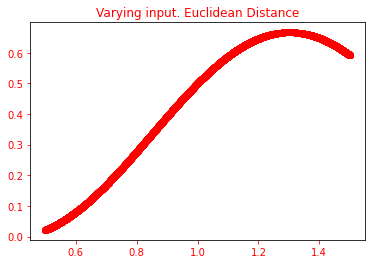

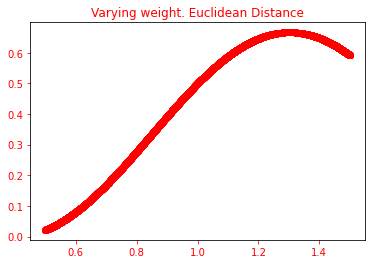

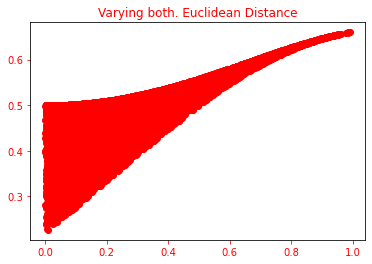

In [7]:
# First let's see only what happens when we change what we're trying to vary
for variation in DIFFERENT_VARIATIONS:
    list_of_x, list_of_y, list_of_z = generate_many_points(10000, 1, varied_part=variation)
    plt.title("Varying " + variation + ". Euclidean Distance", color = "red")
    plot_graph(list_of_x, list_of_y)

In [8]:
def icq_result_1_dim(i_n, w_n):
    assert(len(i_n) == 1)
    assert(len(w_n) == 1)
    x = i_n[0] * w_n[0]
    activation = 2*np.exp(-2j*x)
    return np.round(activation), activation

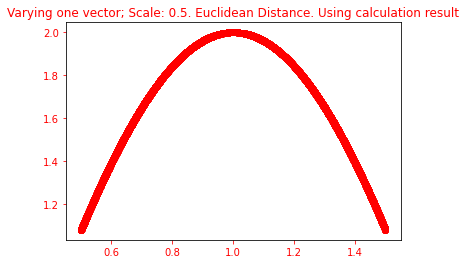

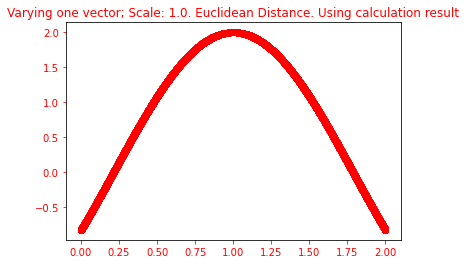

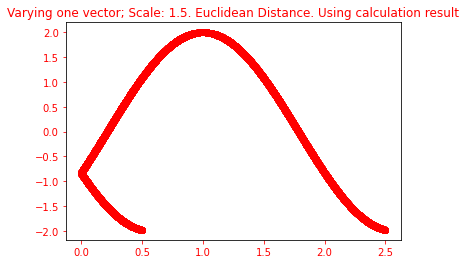

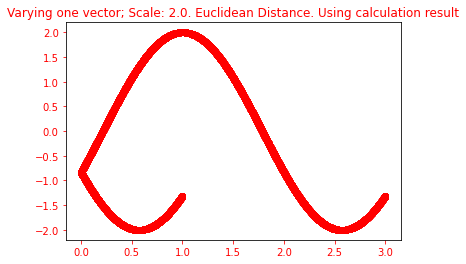

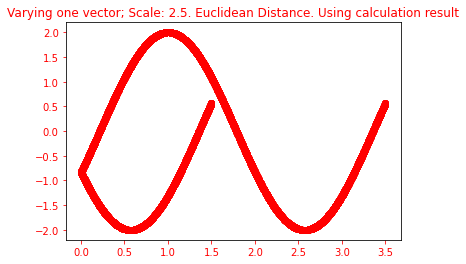

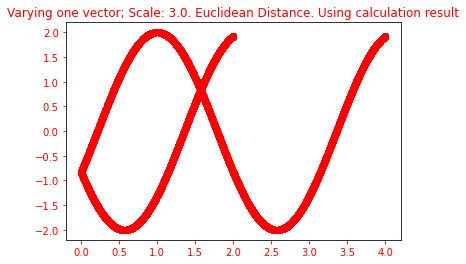

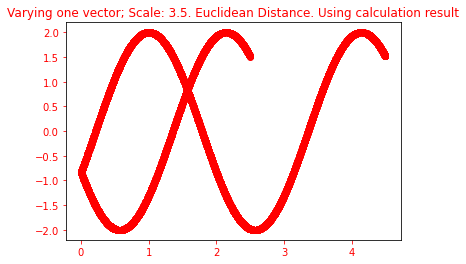

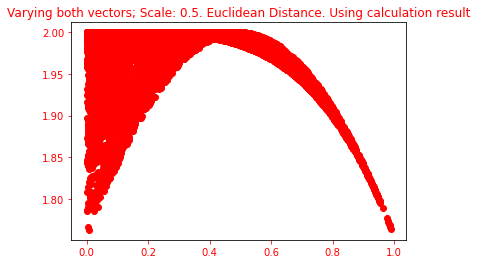

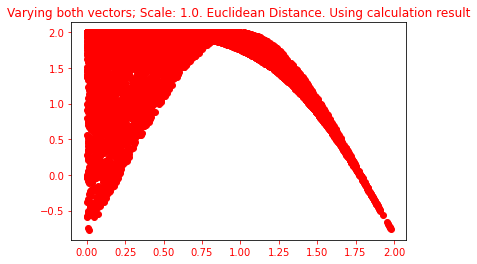

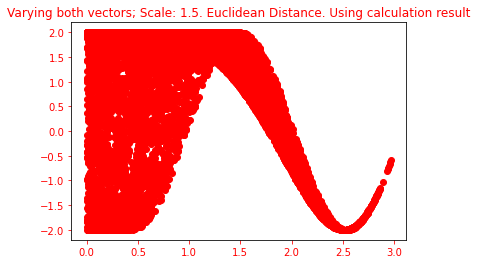

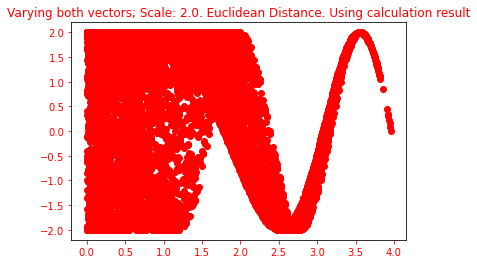

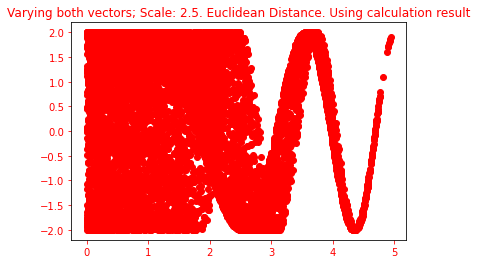

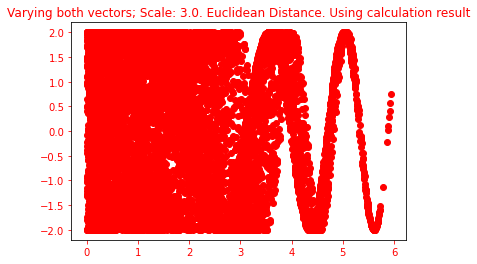

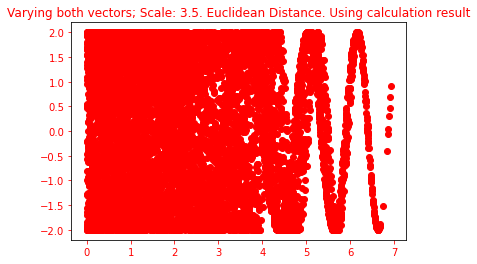

In [9]:
# Last thing we want to know is how the scale affects the points
for variation in [VARY_INPUT, VARY_BOTH]:
    for n in np.arange(0.5, 4, 0.5):
        if variation == VARY_INPUT:
            vary = 'one vector'
        else:
            vary = 'both vectors'
        list_of_x, list_of_y, list_of_z = generate_many_points(10000, 1, scale=n, varied_part=variation, output_func=icq_result_1_dim)
        plt.title("Varying " + vary + "; Scale: " + str(n) + ". Euclidean Distance. Using calculation result", color = "red")
        plot_graph(list_of_x, list_of_y)

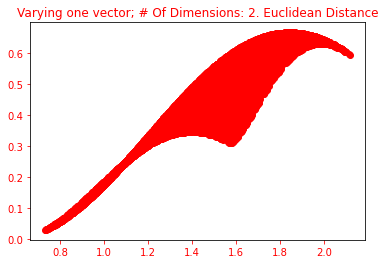

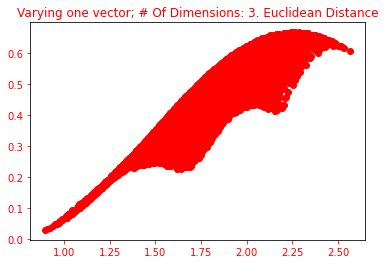

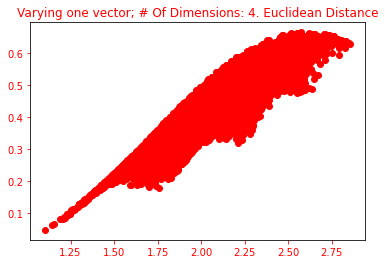

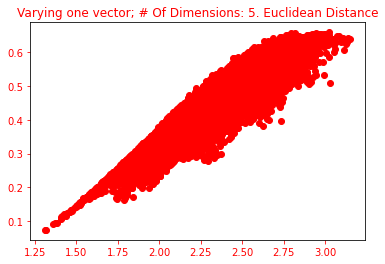

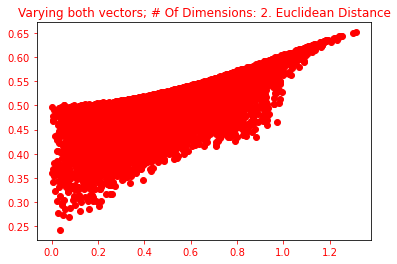

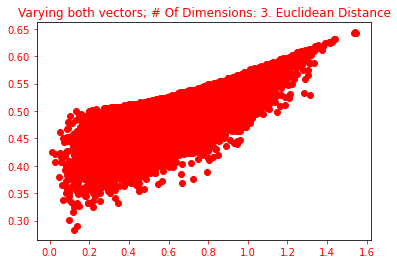

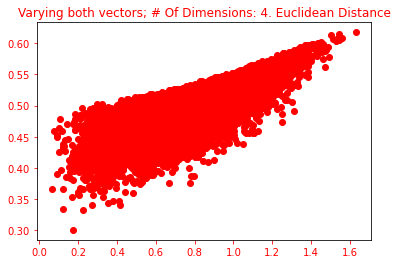

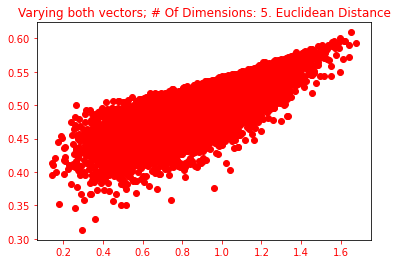

In [10]:
# Apparently they're simmetrical, so it doesn't matter if we're varying weight or input
for variation in [VARY_INPUT, VARY_BOTH]:
    for n in range(2, 6):
        if variation == VARY_INPUT:
            vary = "one vector"
        elif variation == VARY_BOTH:
            vary = "both vectors"
        list_of_x, list_of_y, list_of_z = generate_many_points(10000, n, varied_part=variation)
        plt.title("Varying " + vary + "; # Of Dimensions: " + str(n) + ". Euclidean Distance", color = "red")
        plot_graph(list_of_x, list_of_y)

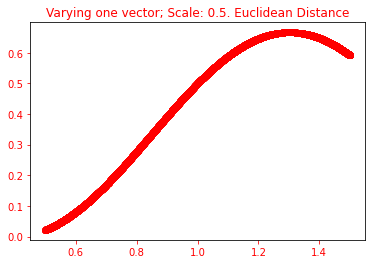

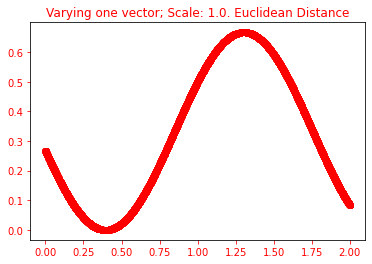

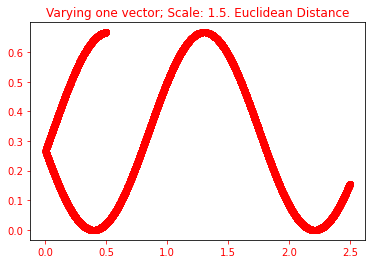

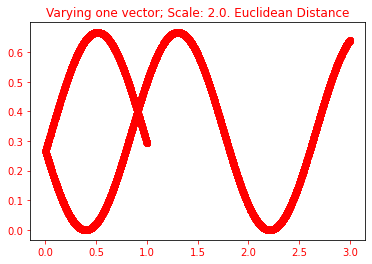

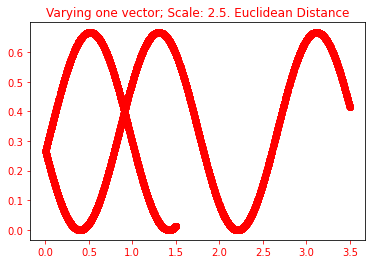

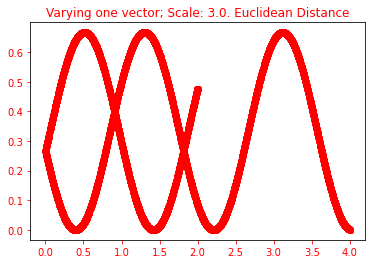

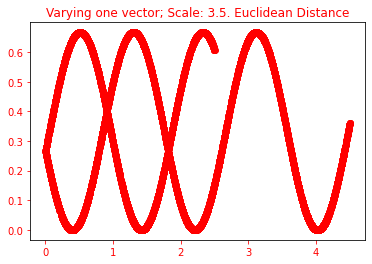

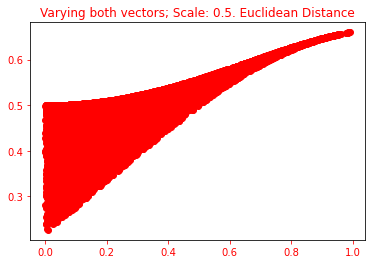

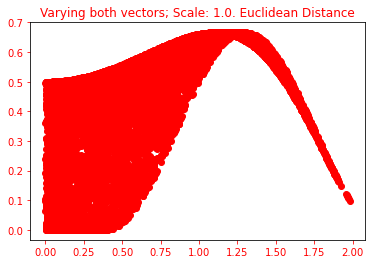

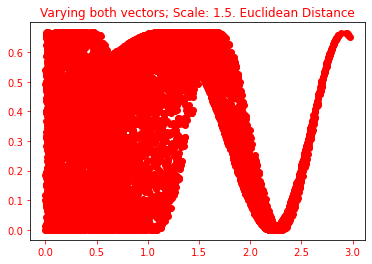

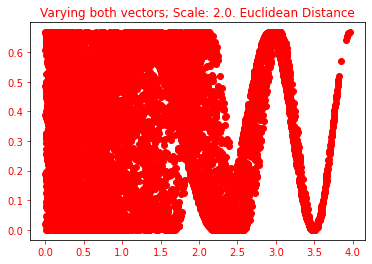

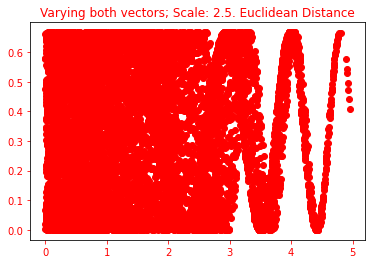

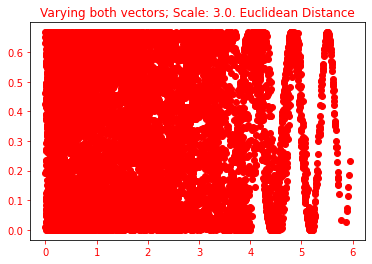

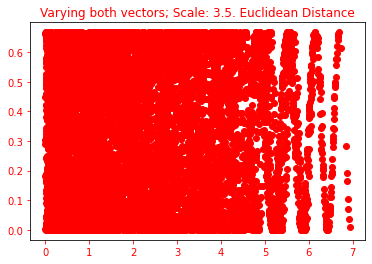

In [11]:
# Last thing we want to know is how the scale affects the points
for variation in [VARY_INPUT, VARY_BOTH]:
    for n in np.arange(0.5, 4, 0.5):
        if variation == VARY_INPUT:
            vary = 'one vector'
        else:
            vary = 'both vectors'
        list_of_x, list_of_y, list_of_z = generate_many_points(10000, 1, scale=n, varied_part=variation)
        plt.title("Varying " + vary + "; Scale: " + str(n) + ". Euclidean Distance", color = "red")
        plot_graph(list_of_x, list_of_y)

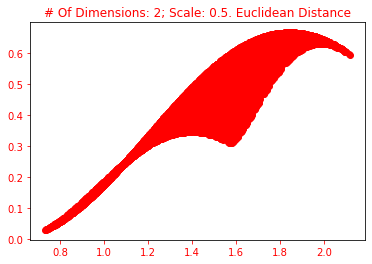

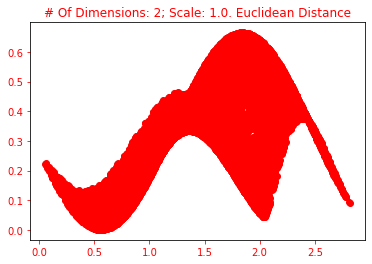

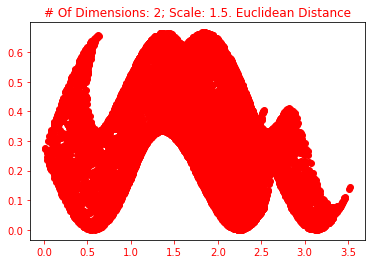

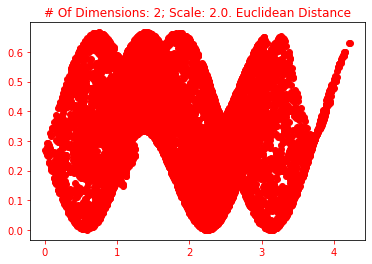

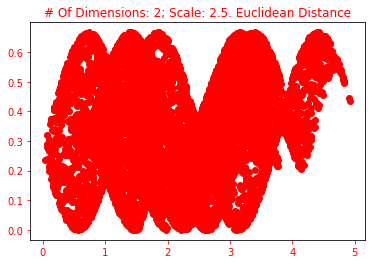

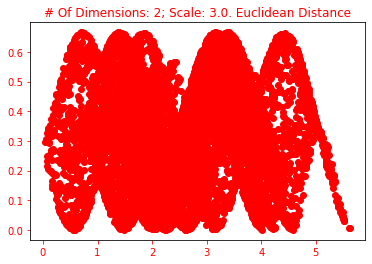

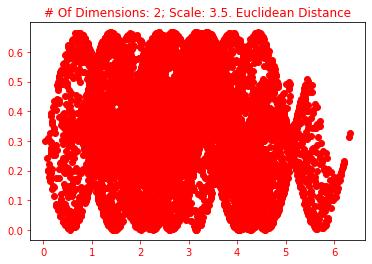

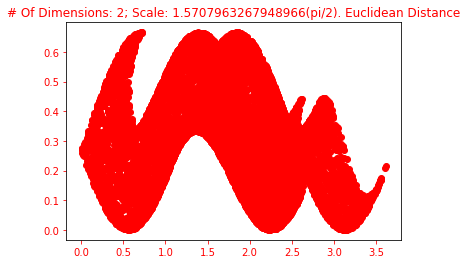

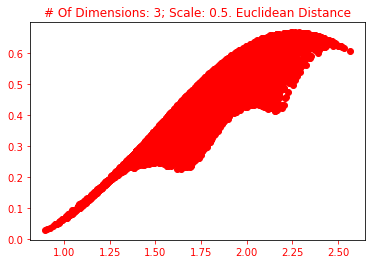

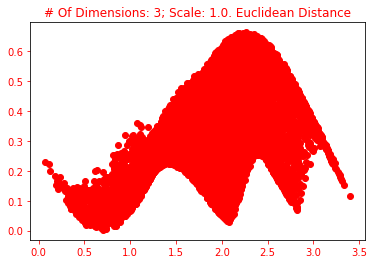

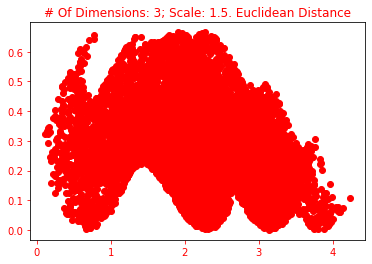

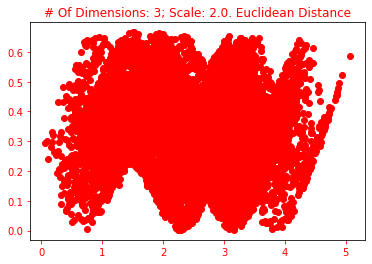

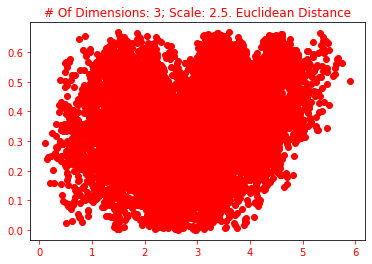

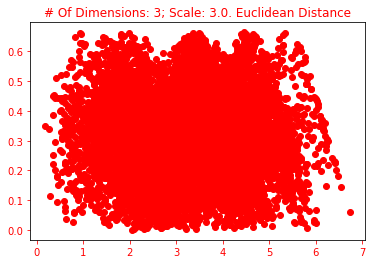

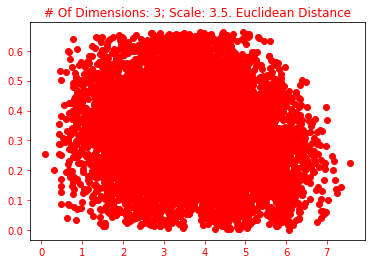

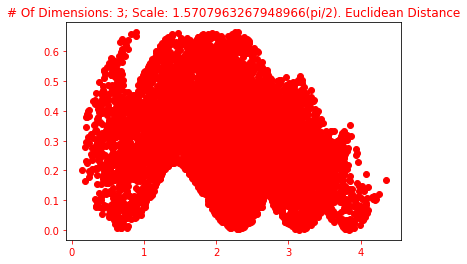

In [12]:
# We already know that varying input and varying weight is the same thing, lets 
# vary both scale and n of dimensions
for dimensions in range(2, 4):
    for n in np.arange(0.5, 4, 0.5):
        list_of_x, list_of_y, list_of_z = generate_many_points(10000, dimensions, scale=n)
        plt.title("# Of Dimensions: " + str(dimensions) + "; Scale: " + str(n) + ". Euclidean Distance", color = "red")
        plot_graph(list_of_x, list_of_y)
    list_of_x, list_of_y, list_of_z = generate_many_points(10000, dimensions, scale=np.pi/2)
    plt.title("# Of Dimensions: " + str(dimensions) + "; Scale: " + str(np.pi/2) + "(pi/2). Euclidean Distance", color = "red")
    plot_graph(list_of_x, list_of_y)

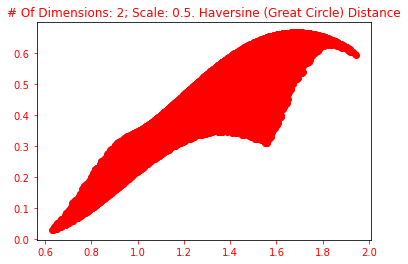

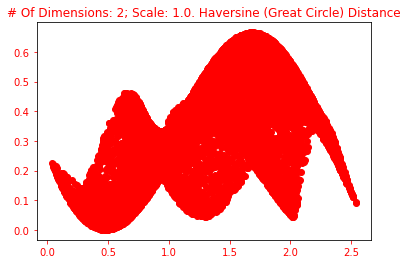

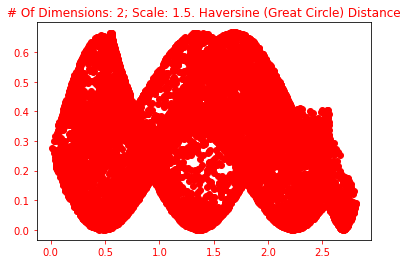

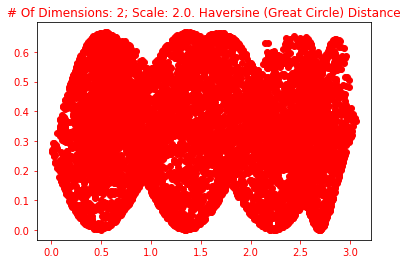

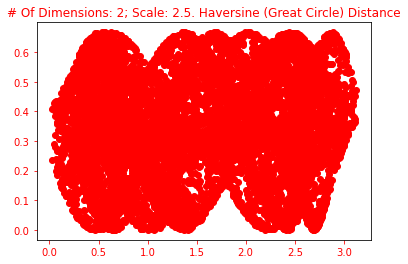

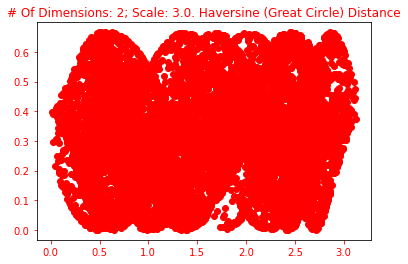

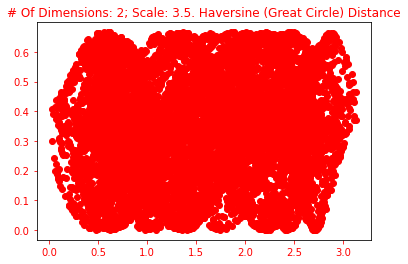

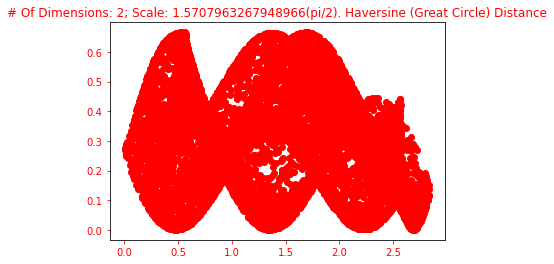

In [13]:
# What happens when we change the distance calculation?
# This one is known as great circle distance
for dimensions in range(2, 3):
    for n in np.arange(0.5, 4, 0.5):
        list_of_x, list_of_y, list_of_z = generate_many_points(10000, dimensions, scale=n, distance_func=haversine_distances)
        plt.title("# Of Dimensions: " + str(dimensions) + "; Scale: " + str(n) + ". Haversine (Great Circle) Distance", color = "red")
        plot_graph(list_of_x, list_of_y)
    
    list_of_x, list_of_y, list_of_z = generate_many_points(10000, dimensions, scale=np.pi/2, distance_func=haversine_distances)
    plt.title("# Of Dimensions: " + str(dimensions) + "; Scale: " + str(np.pi/2) + "(pi/2). Haversine (Great Circle) Distance", color = "red")
    plot_graph(list_of_x, list_of_y)

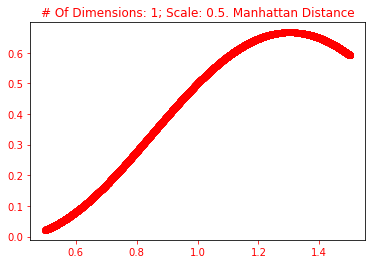

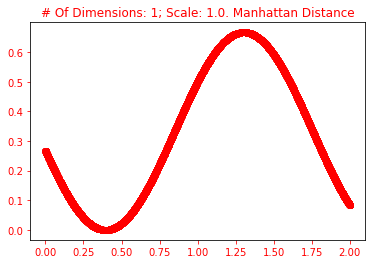

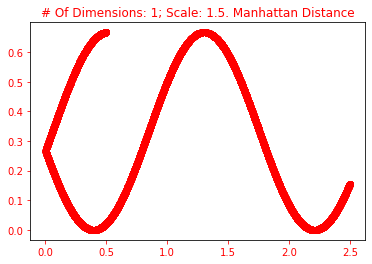

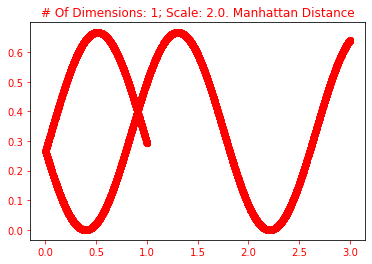

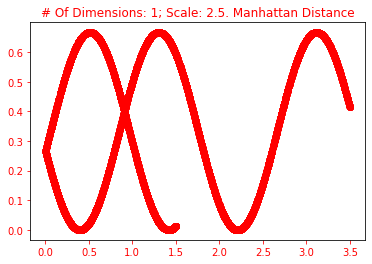

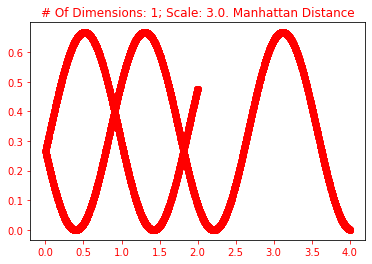

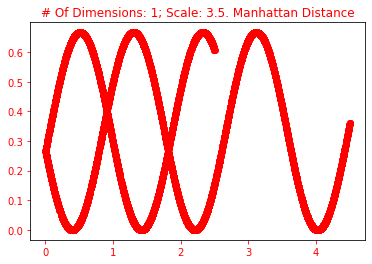

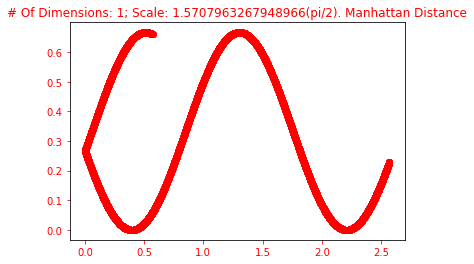

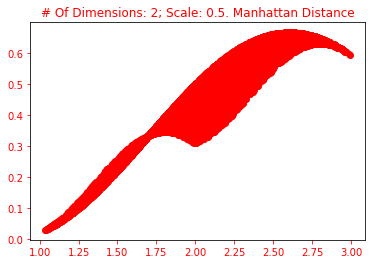

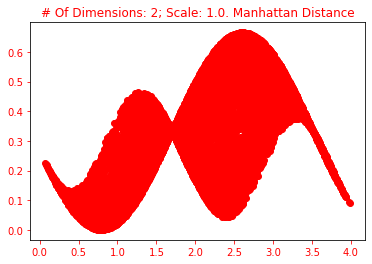

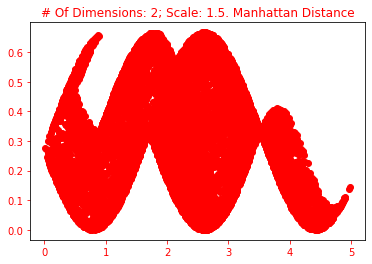

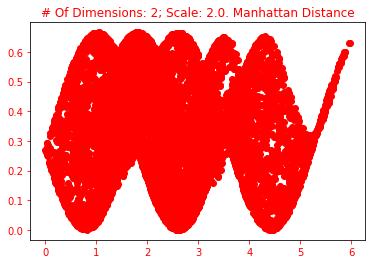

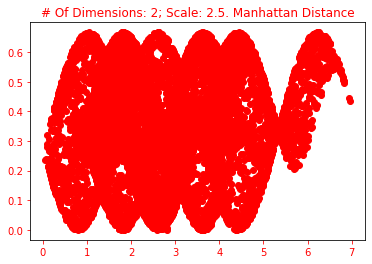

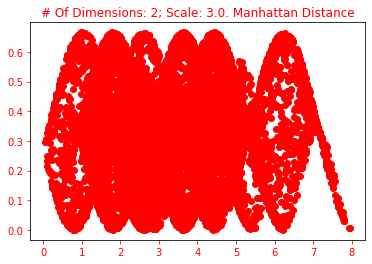

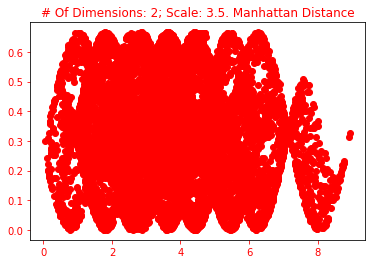

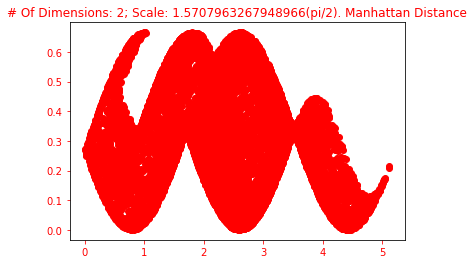

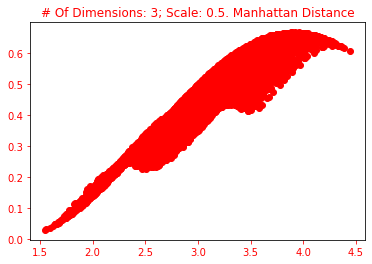

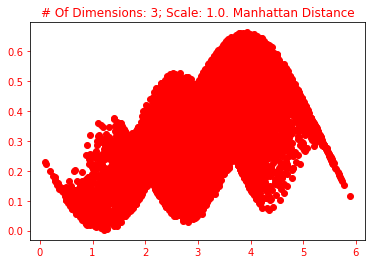

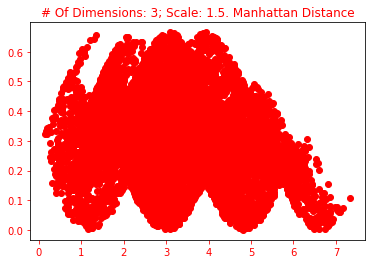

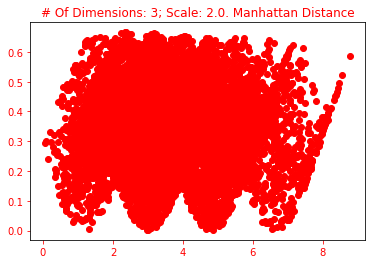

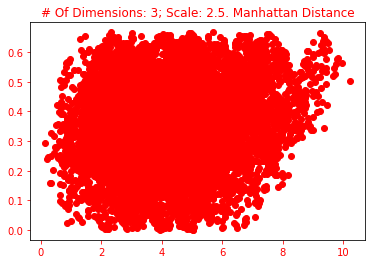

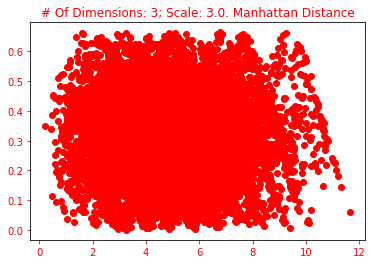

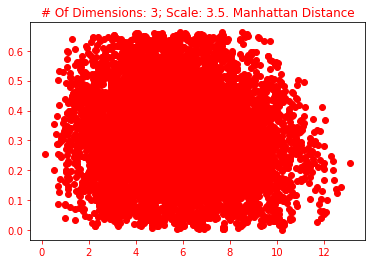

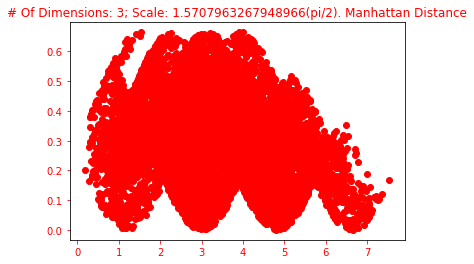

In [14]:
# What happens when we change the distance calculation? - Manthattan
for dimensions in range(1, 4):
    for n in np.arange(0.5, 4, 0.5):
        list_of_x, list_of_y, list_of_z = generate_many_points(10000, dimensions, scale=n, distance_func=manhattan_distances)
        plt.title("# Of Dimensions: " + str(dimensions) + "; Scale: " + str(n) + ". Manhattan Distance", color = "red")
        plot_graph(list_of_x, list_of_y)
    list_of_x, list_of_y, list_of_z = generate_many_points(10000, dimensions, scale=np.pi/2, distance_func=manhattan_distances)
    plt.title("# Of Dimensions: " + str(dimensions) + "; Scale: " + str(np.pi/2) + "(pi/2). Manhattan Distance", color = "red")
    plot_graph(list_of_x, list_of_y)

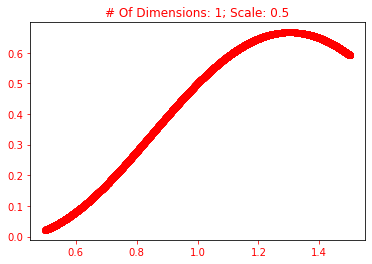

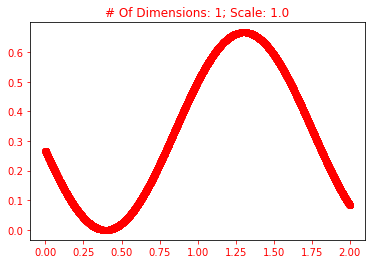

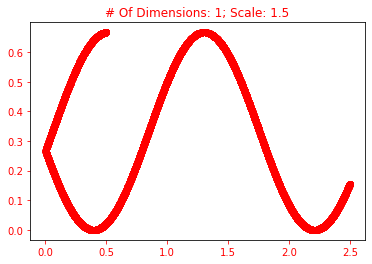

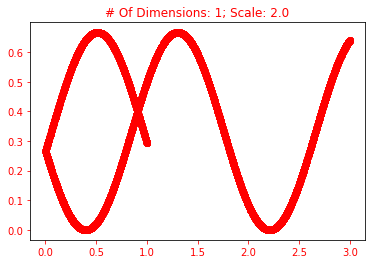

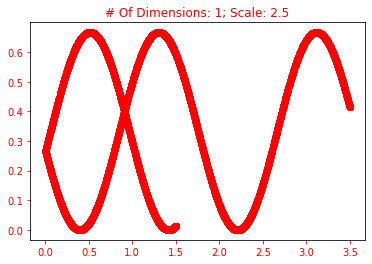

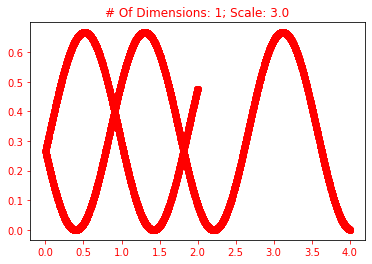

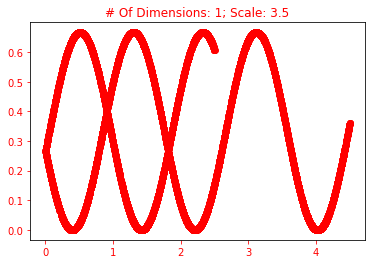

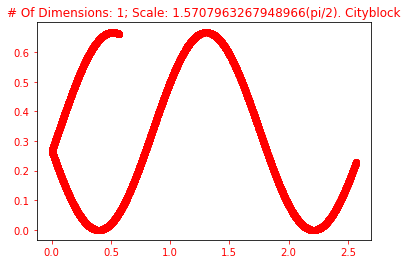

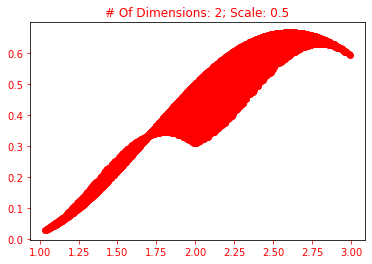

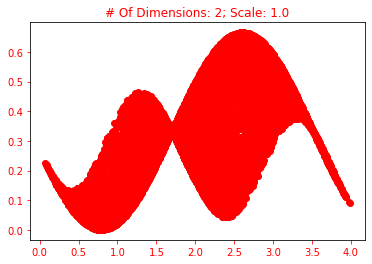

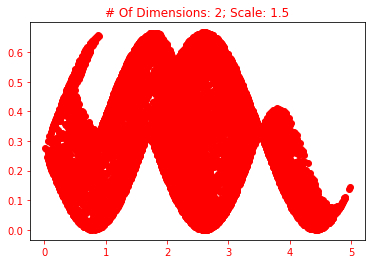

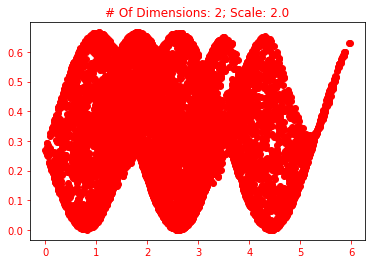

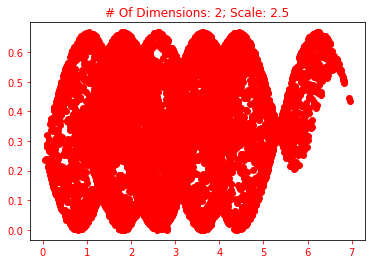

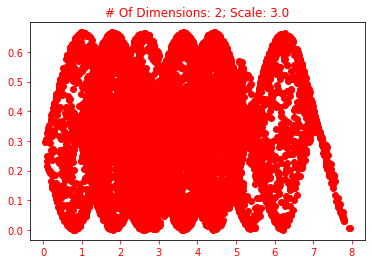

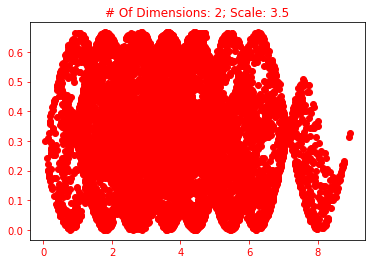

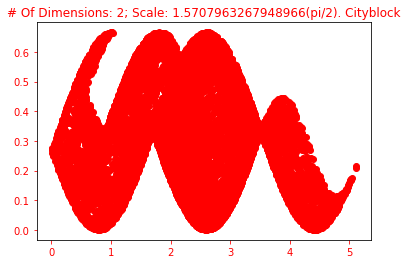

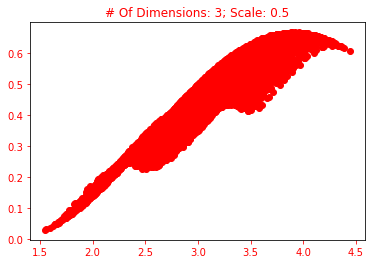

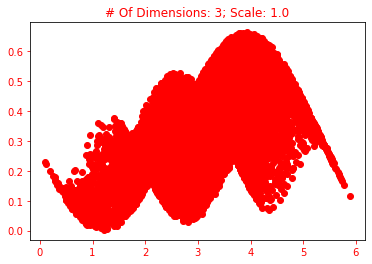

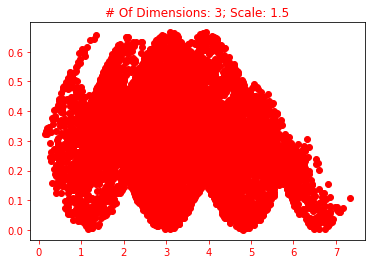

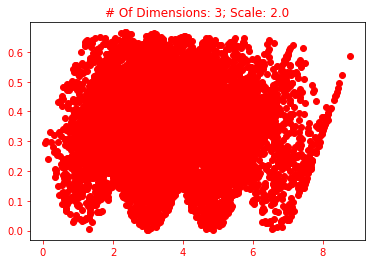

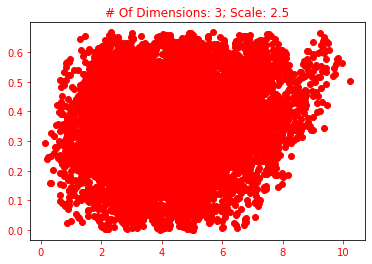

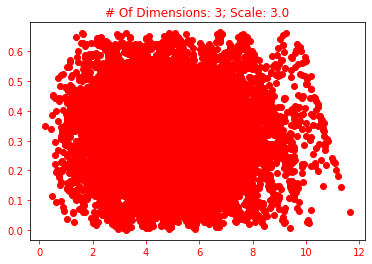

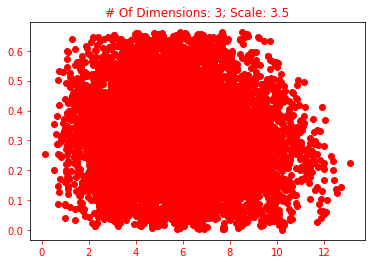

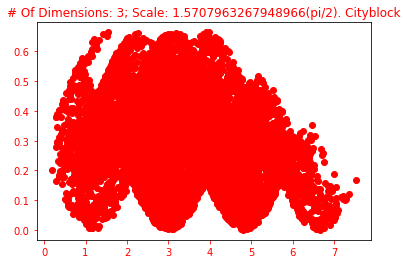

In [15]:
# What happens when we change the distance calculation? - Cityblock
for dimensions in range(1, 4):
    for n in np.arange(0.5, 4, 0.5):
        list_of_x, list_of_y, list_of_z = generate_many_points(10000, dimensions, scale=n, distance_func=cityblock)
        plt.title("# Of Dimensions: " + str(dimensions) + "; Scale: " + str(n), color = "red")
        plot_graph(list_of_x, list_of_y)
    list_of_x, list_of_y, list_of_z = generate_many_points(10000, dimensions, scale=np.pi/2, distance_func=cityblock)
    plt.title("# Of Dimensions: " + str(dimensions) + "; Scale: " + str(np.pi/2) + "(pi/2). Cityblock", color = "red")
    plot_graph(list_of_x, list_of_y)

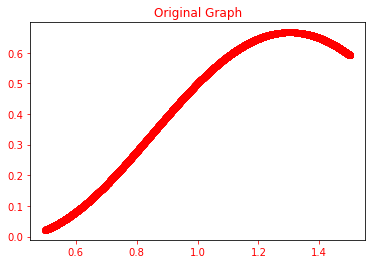

In [16]:
# Do we really have more than one y per x?
list_of_x, list_of_y, list_of_z = generate_many_points(10000, 1, varied_part=VARY_INPUT)
plt.title("Original Graph", color = "red")
plot_graph(list_of_x, list_of_y)

[0.701975486478075, 0.7011529765171337, 0.701725616636437, 0.701224409703764, 0.7015233498941739]
[0.17096016943162057, 0.170131377063941, 0.17070825135233786, 0.17020330342395956, 0.17050441581117087]


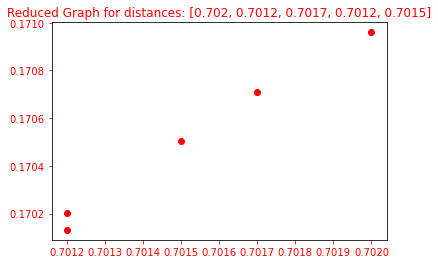

In [17]:
# Lets try to see what happens when we have very close distances
new_xs = [x for x in list_of_x if x > 0.701 and x < 0.702]
print(new_xs)

indices = [list_of_x.index(x) for x in new_xs]
new_ys = [list_of_y[i] for i in indices]
print(new_ys)

rounded_xs = [round(x, 4) for x in new_xs]
plt.title("Reduced Graph for distances: " + str(rounded_xs), color = "red")
plot_graph(rounded_xs, new_ys)

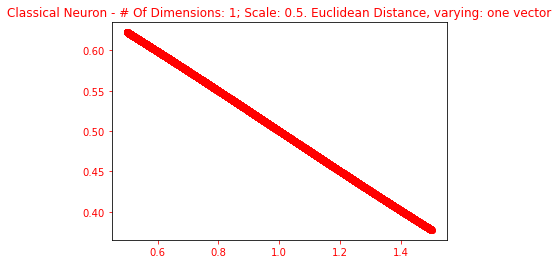

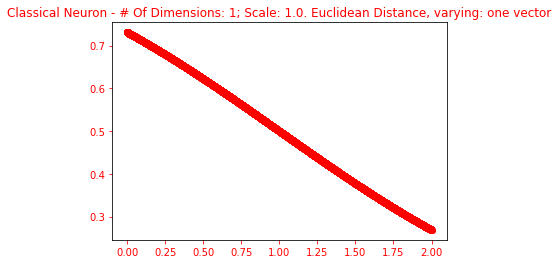

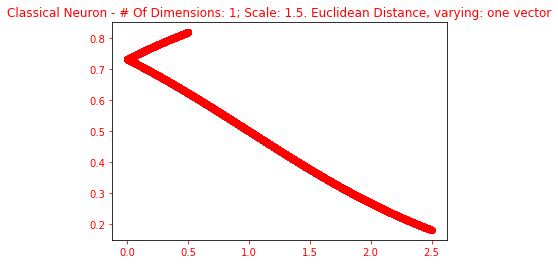

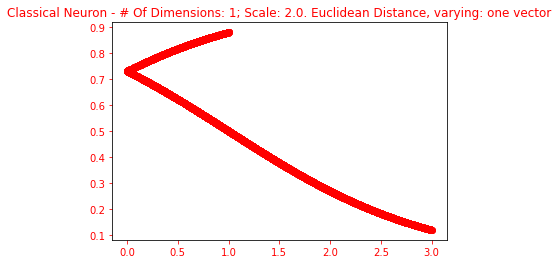

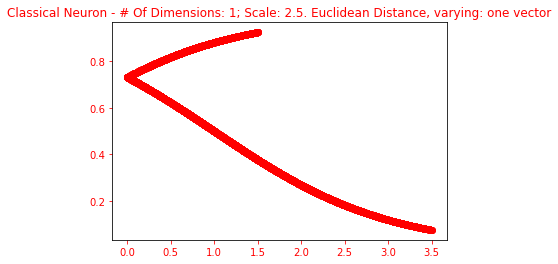

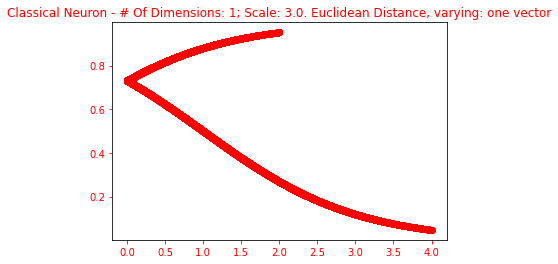

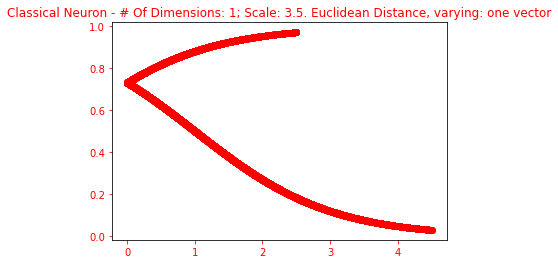

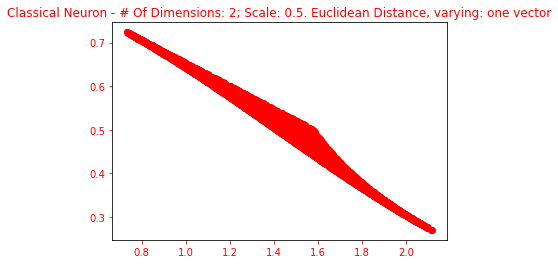

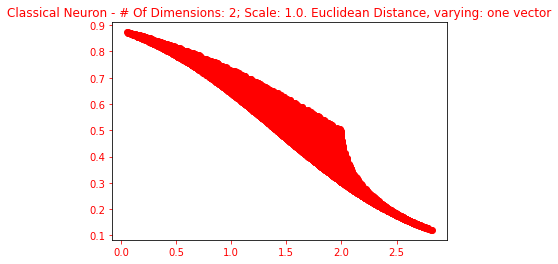

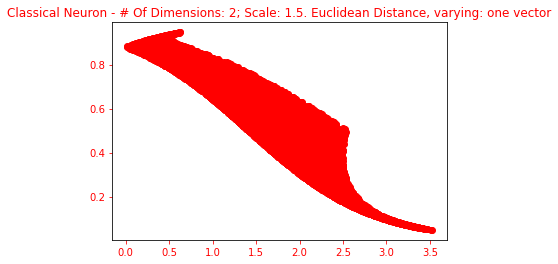

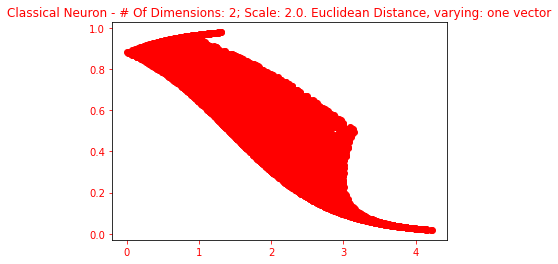

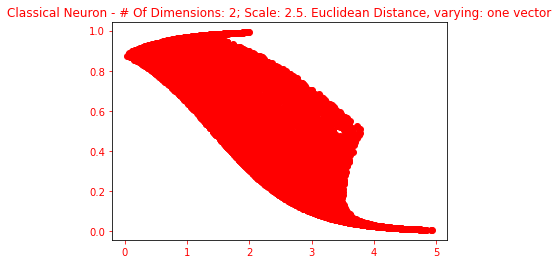

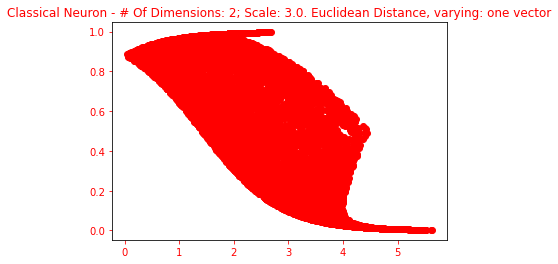

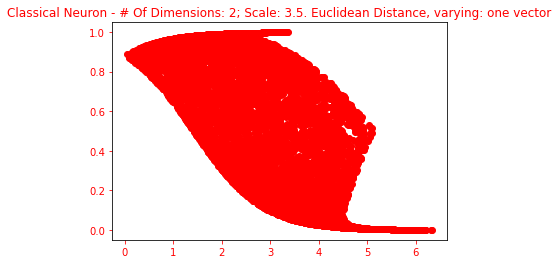

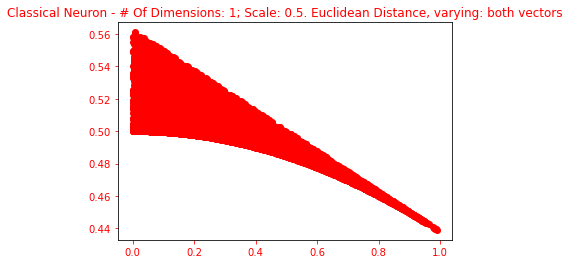

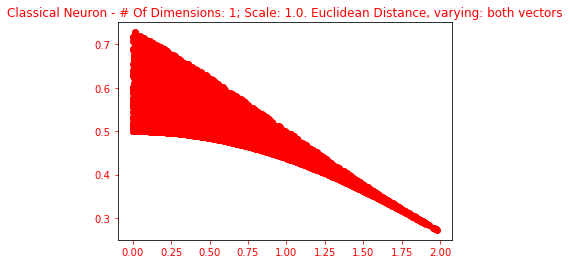

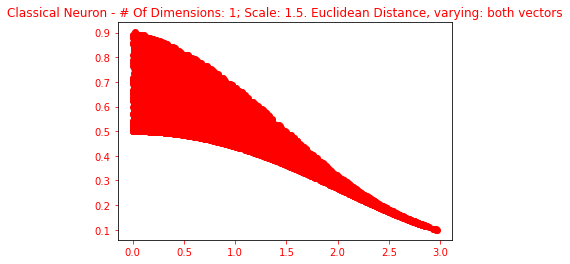

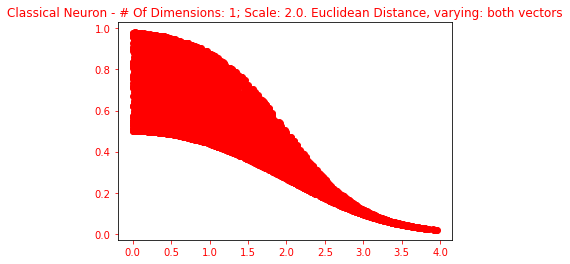

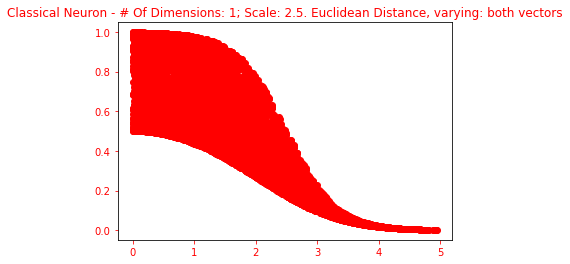

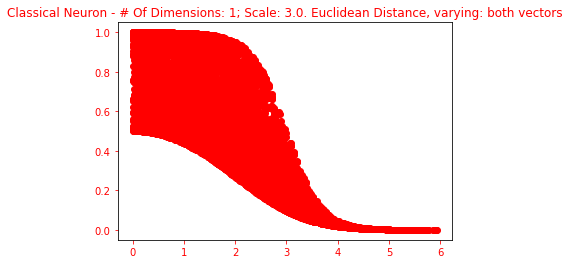

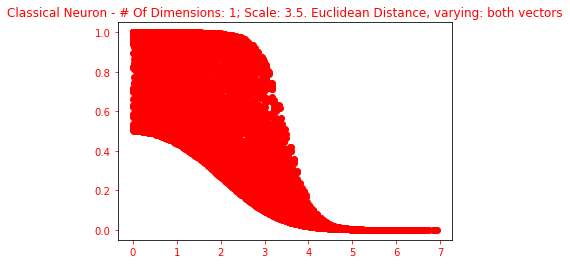

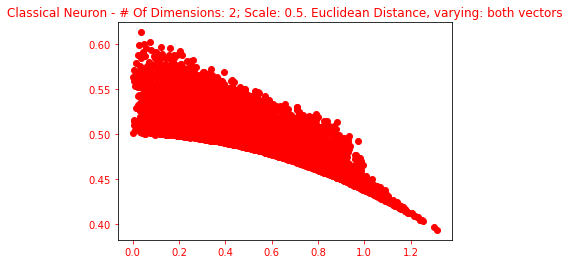

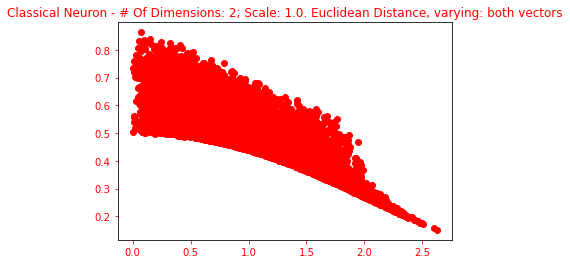

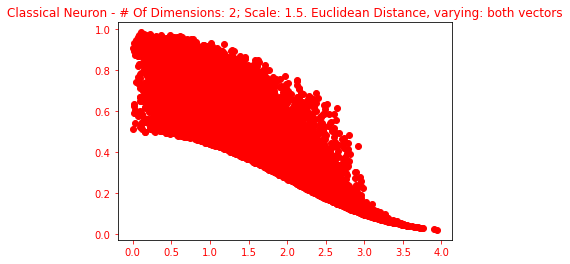

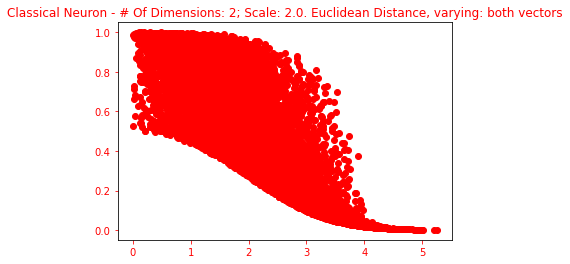

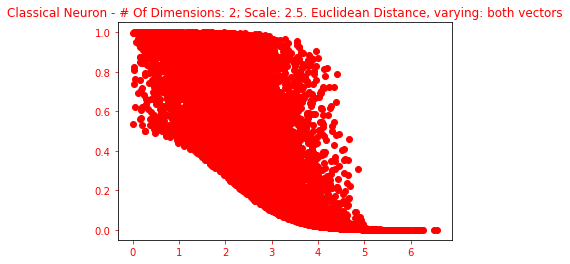

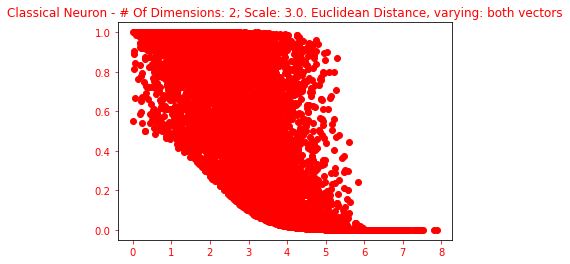

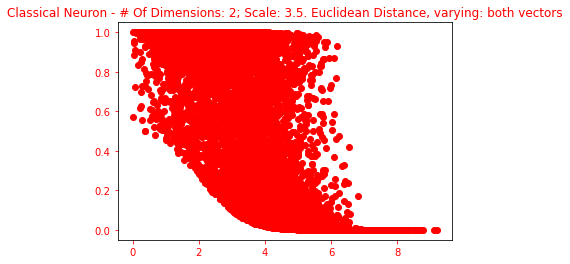

In [18]:
for variation in [VARY_INPUT, VARY_BOTH]:
    for dimensions in range(1, 3):
        for n in np.arange(0.5, 4, 0.5):
            if variation == VARY_INPUT:
                vary = 'one vector'
            else:
                vary = 'both vectors'
            list_of_x, list_of_y, list_of_z = generate_many_points(10000, dimensions, scale=n, varied_part=variation, output_func=classical_neuron_output_func)
            plt.title("Classical Neuron - # Of Dimensions: " + str(dimensions) + "; Scale: " + str(n) + ". Euclidean Distance" + ", varying: " + vary, color = "red")
            plot_graph(list_of_x, list_of_y)